<a href="https://colab.research.google.com/github/AsadNazir/ML-Semester-Project/blob/main/ModifiedCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns


## Getting the Dataset

In [18]:
from google.colab import drive
drive.mount('/content/drive/')


path='/content/drive/MyDrive/waterQuality1.csv'
path2='/content/drive/MyDrive/PredictionDataSet.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(path)
predict= pd.read_csv(path2)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [19]:
# Displaying the data
df.head(10)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
6,2.36,5.6,0.01,1.35,0.004,1.28,0.62,1.88,0.33,0.13,...,0.021,18.60,1.78,0.007,45.34,2.84,0.10,0.24,0.08,0
7,3.93,19.87,0.04,0.66,0.001,6.22,0.10,1.86,0.86,0.16,...,0.197,13.65,1.81,0.001,53.35,7.24,0.08,0.08,0.07,0
8,0.60,24.58,0.01,0.71,0.005,3.14,0.77,1.45,0.98,0.35,...,0.167,14.66,1.84,0.004,23.43,4.99,0.08,0.25,0.08,1
9,0.22,16.76,0.02,1.37,0.007,6.40,0.49,0.82,1.24,0.83,...,0.109,4.79,1.46,0.010,30.42,0.08,0.03,0.31,0.01,1


## Cleaning the Data set

In [20]:
# Setting Nan in all columns where it is non number value
i=0
for column_name, column_data in df.items():
  df.iloc[:, i] = pd.to_numeric(df[column_name], errors='coerce')
  i=i+1

# Remove rows with NaN values in 'is_safe' columns
df = df.dropna(subset=['is_safe'])


<ipython-input-20-cd4c0671f6ed>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, i] = pd.to_numeric(df[column_name], errors='coerce')


In [21]:
# Checking for Nan in all columns
for column_name, column_data in df.items():
  print(df[column_name].isnull().values.any(), column_name)

False aluminium
False ammonia
False arsenic
False barium
False cadmium
False chloramine
False chromium
False copper
False flouride
False bacteria
False viruses
False lead
False nitrates
False nitrites
False mercury
False perchlorate
False radium
False selenium
False silver
False uranium
False is_safe


In [22]:
# Compute the median for each column
median_values = df.median()

# Fill NaN values with the median
df.fillna(median_values, inplace=True)


# Checking for Nan in all columns
for column_name, column_data in df.items():
  print(df[column_name].isnull().values.any(), column_name)


False aluminium
False ammonia
False arsenic
False barium
False cadmium
False chloramine
False chromium
False copper
False flouride
False bacteria
False viruses
False lead
False nitrates
False nitrites
False mercury
False perchlorate
False radium
False selenium
False silver
False uranium
False is_safe


<Axes: >

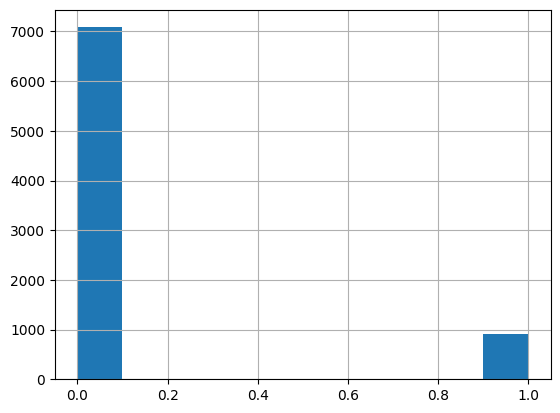

In [23]:
df["is_safe"].hist()

## Spliting the dataset

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separate the features (X) and the target variable (y)
X = df.drop("is_safe", axis=1)
y = df["is_safe"]

# Split the data into training and testing sets 80 20 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




## KNN Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

# Printing the accuracy
knn_accuracy =100* accuracy_score(y_test, knn_predictions)
knn_accuracy

85.5

## Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)

# Printing the accuracy
dt_accuracy =100* accuracy_score(y_test, dt_predictions)
dt_accuracy

96.3125

## Support Vector Machine Classifier

In [26]:
from sklearn.svm import SVC

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)

# Printing the accuracy
svm_accuracy =100* accuracy_score(y_test, svm_predictions)
svm_accuracy

87.5

## Printing thr Accuracies

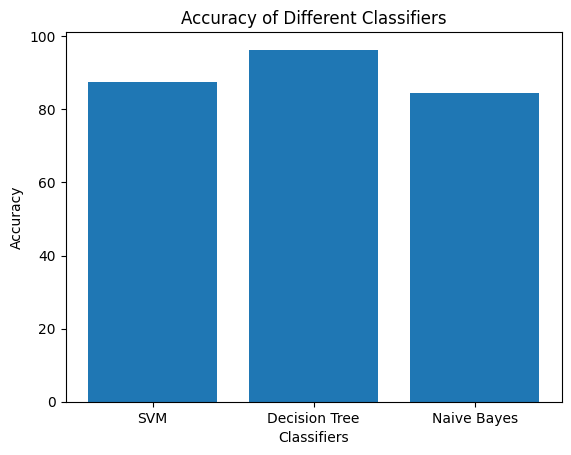

In [27]:

# Printing the accuracies
accuracies = [svm_accuracy, dt_accuracy, nb_accuracy]

# Define the labels for each classifier
classifiers = ['SVM', 'Decision Tree', 'Naive Bayes']

# Plot the histogram
plt.bar(classifiers, accuracies)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.show()









## Making Live Predictions

In [28]:
labels = predict["is_safe"];
withoutLabels = predict.drop("is_safe", axis=1)
withoutLabels



,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,2.11,0.006,50.28,7.07,0.07,0.44,0.01
3,2.03,28.45,0.89,2.66,0.110,4.65,0.77,1.84,0.40,0.59,0.590,0.178,5.86,1.45,0.004,25.24,4.83,0.02,0.10,0.02
4,4.04,8.96,0.72,4.12,0.020,6.86,0.43,1.35,0.32,0.29,0.008,0.198,16.67,2.55,0.001,18.85,4.90,0.06,0.16,0.01


In [29]:
res = dt.predict(withoutLabels);
acc = 100* accuracy_score(labels, res)

print(acc)
print(labels)
print(res)

100.0
0    1
1    1
2    0
3    1
4    0
Name: is_safe, dtype: int64
[1. 1. 0. 1. 0.]
